# Computer Vision 2023 Assignment 1: Image filtering.

In this prac you will research, implement and test some image filtering operations. Image filtering by convolution is a fundamental step in many computer vision tasks and you will find it useful to have a firm grasp of how it works. For example, later in the course we will come across Convolutional Neural Networks (CNNs) which are built from convolutional image filters.

The main aims of the prac are:

- to understand the basics of how images are stored and processed in memory;
- to gain exposure to several common image filters, and understand how they work;
- to get practical experience implementing convolutional image filters;
- to test your intuition about image filtering by running some experiments;
- to report your results in a clear and concise manner.

*This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.*

## General instructions

Follow the instructions in this Python notebook and the accompanying file *a1code.py* to answer each question. It's your responsibility to make sure your answer to each question is clearly labelled and easy to understand. Note that most questions require some combination of Python code, graphical output, and text analysing or describing your results. Although we will check your code as needed, marks will be assigned based on the quality of your write up rather than for code correctness! This is not a programming test - we are more interested in your understanding of the topic.

Only a small amount of code is required to answer each question. We will make extensive use of the Python libraries

- [numpy](numpy.org) for mathematical functions
- [skimage](https://scikit-image.org) for image loading and processing
- [matplotlib](https://matplotlib.org/stable/index.html) for displaying graphical results
- [jupyter](https://jupyter.org) for Jupyter Notebooks

You should get familiar with the documentation for these libraries so that you can use them effectively.

# The Questions

To get started, below is some setup code to import the libraries we need. You should not need to edit it.

In [1]:
# Numpy is the main package for scientific computing with Python.
import numpy as np

#from skimage import io

# Imports all the methods we define in the file a1code.py
from a1code import *

# Matplotlib is a useful plotting library for python
import matplotlib.pyplot as plt
# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

## Question 0: Numpy warm up! (5%)

Before starting the assignment, make sure you have a working Python 3 installation, with up to date versions of the libraries mentioned above. If this is all new to you, I'd suggest  downloading an all in one Python installation such as [Anaconda](https://www.anaconda.com/products/individual). Alternatively you can use a Python package manager such as pip or conda, to get the libraries you need. If you're struggling with this please ask a question on the MyUni discussion forum.

For this assignment, you need some familiarity with numpy syntax. The numpy QuickStart should be enough to get you started:

https://numpy.org/doc/stable/user/quickstart.html

Here are a few warm up exercises to make sure you understand the basics. Answer them in the space below. Be sure to print the output of each question so we can see it!

1. Create a 1D numpy array Z with 12 elements. Fill with values 1 to 12.
2. Reshape Z into a 2D numpy array A with 3 rows and 4 columns.
3. Reshape Z into a 2D numpy array B with 4 rows and 3 columns.
4. Calculate the *matrix* product of A and B.
5. Calculate the *element wise* product of $A$ and $B^T$ (B transpose).


In [2]:
z = np.arange(1, 13, 1)
print("Array Z: ", z)

a = z.reshape(3, 4)
print("Array A: ",a)

b = z.reshape(4, 3)
print("Array B: ", b)

product = a.dot(b)
print("Product A and B: ", product)

transpose = np.multiply(a, b.T)
print("Element wise product A and B: ", transpose)



Array Z:  [ 1  2  3  4  5  6  7  8  9 10 11 12]
Array A:  [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Array B:  [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Product A and B:  [[ 70  80  90]
 [158 184 210]
 [246 288 330]]
Element wise product A and B:  [[  1   8  21  40]
 [ 10  30  56  88]
 [ 27  60  99 144]]


You need to be comfortable with numpy arrays because that is how we store images. Let's do that next!

## Question 1: Loading and displaying an image (10%)

Below is a function to display an image using the pyplot module in matplotlib. Implement the `load()` and `print_stats()` functions in a1code.py so that the following code loads the mandrill image, displays it and prints its height, width and channel. 

In [3]:
def display(img, caption=''):
    # Show image using pyplot
    plt.figure()
    plt.imshow(img)
    plt.title(caption)
    plt.axis('off')
    plt.show()

# if the image is outside the range either 0 <= x <= 1 or 0 <= x <= 255, then there is the possibility for artifacts when the image appears or the possibility for information loss.

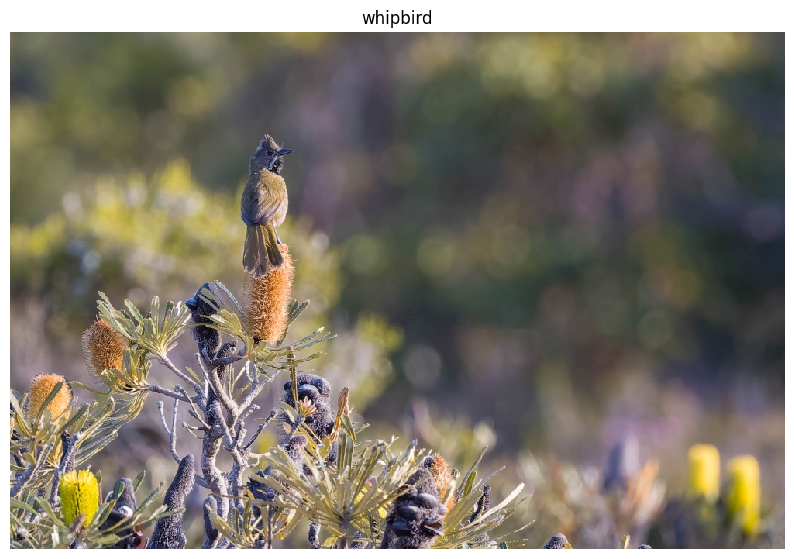

Height:  667
Width:  1000
Channels:  3


In [4]:
image1 = load('images/whipbird.jpg')
display(image1, 'whipbird')
print_stats(image1)

Return to this question after reading through the rest of the assignment. Find 2 more images to use as test cases in this assignment for all the following questions and display them below. Use your print_stats() function to display their height, width and number of channels. Explain *why* you have chosen each image.

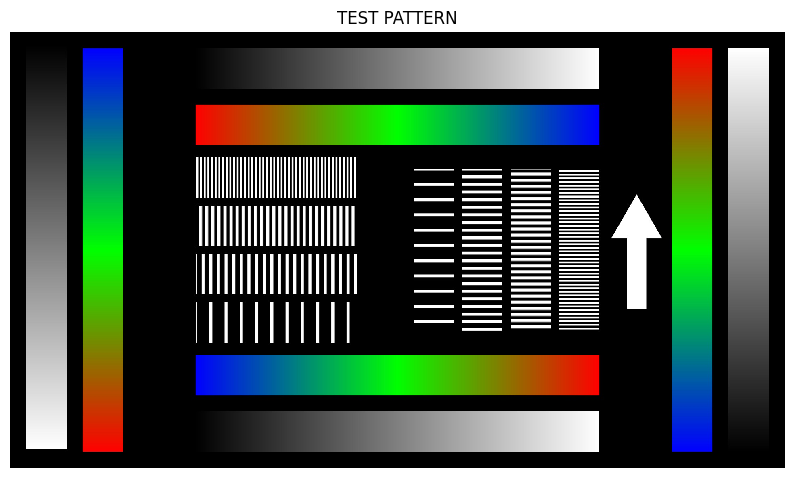

Height:  1080
Width:  1920
Channels:  3


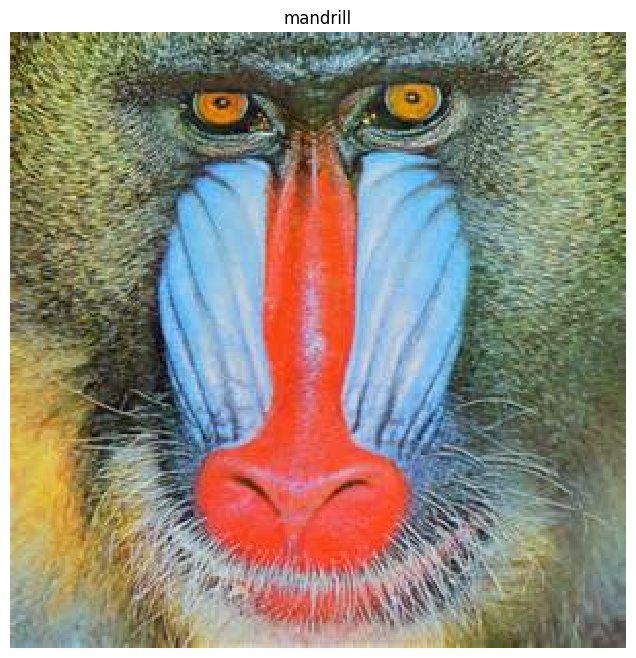

Height:  300
Width:  300
Channels:  3


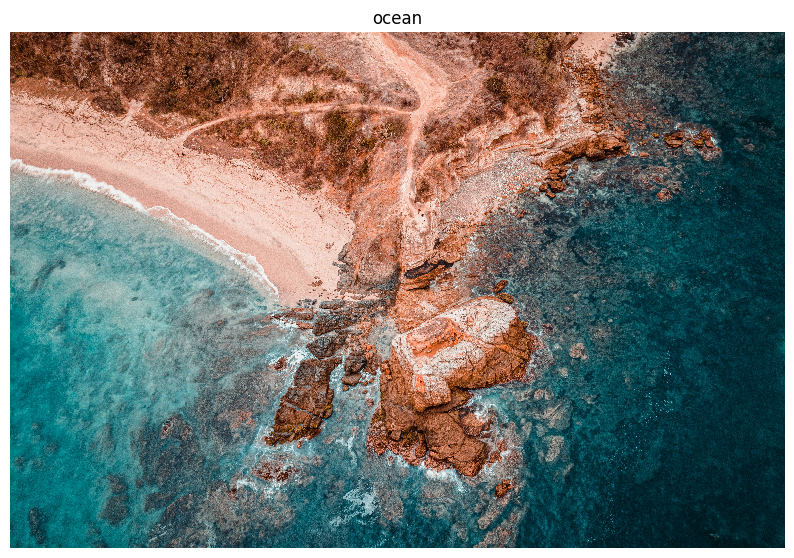

Height:  3630
Width:  5449
Channels:  3


In [5]:
### Your code to load and display your images here
image2 = load('images/CV-TEST-PATERN.jpg')
display(image2, 'TEST PATTERN')
print_stats(image2)

image3 = load('images/mandrill.jpg')
display(image3, 'mandrill')
print_stats(image3)

image4 = load('images/ocean.jpg')
display(image4, 'ocean')
print_stats(image4)

The two other images that I have choose are the test pattern, as this has the range of colours and gradient so that I'm able to see the manipulations that are taking place. and the other images is just a really large images to see what happens when the functions are handed a large amount of data.

***Your explanation of images here***

## Question 2: Image processing (25%)

Now that you have an image stored as a numpy array, let's try some operations on it.

1. Implement the `crop()` function in a1code.py. Use array slicing to crop the image.
2. Implement the `resize()` function in a1code.py.
3. Implement the `change_contrast()` function in a1code.py.
4. Implement the `greyscale()` function in a1code.py.
5. Implement the `binary()` function in a1code.py.

What do you observe when you change the threshold of the binary function?

Apply all these functions with different parameters on your own test images.

In [6]:
a = np.array([[99, 98, 80], [99, 98, 80], [99, 98, 80]])
a = 0.5 * (a - 128) + 128
print(a)

[[113.5 113.  104. ]
 [113.5 113.  104. ]
 [113.5 113.  104. ]]


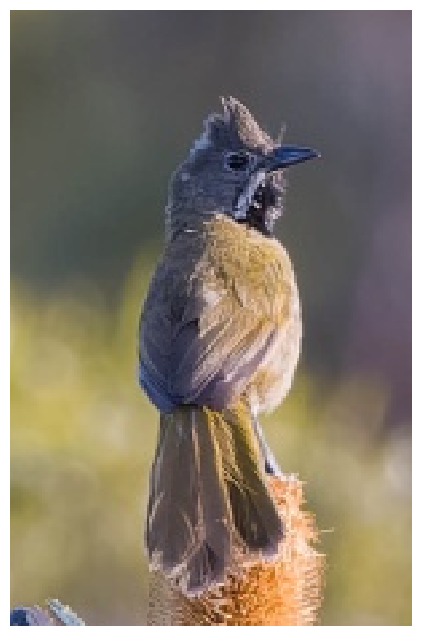

Height:  230
Width:  150
Channels:  3


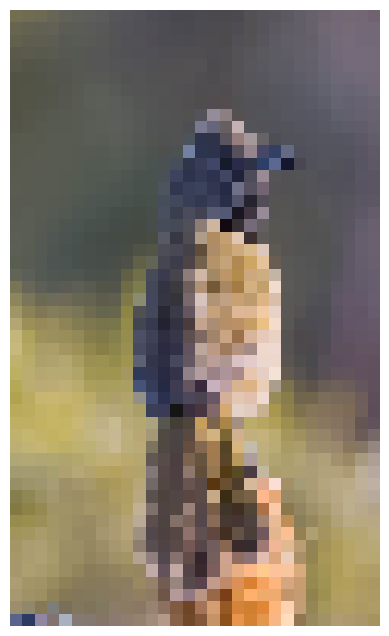

Height:  50
Width:  30
Channels:  3


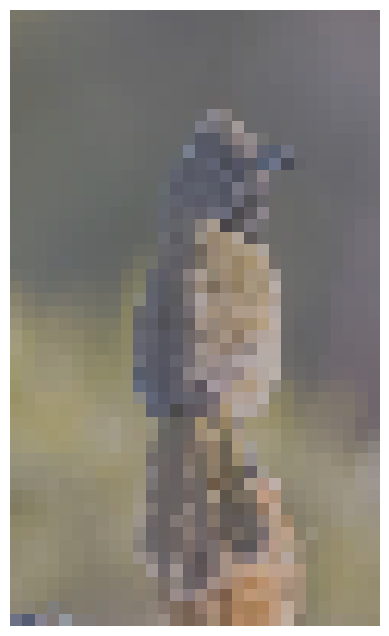

Height:  50
Width:  30
Channels:  3


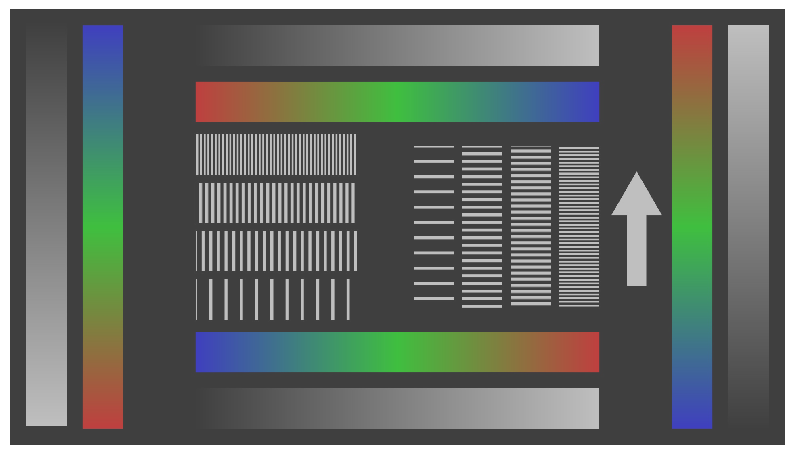

Height:  1080
Width:  1920
Channels:  3


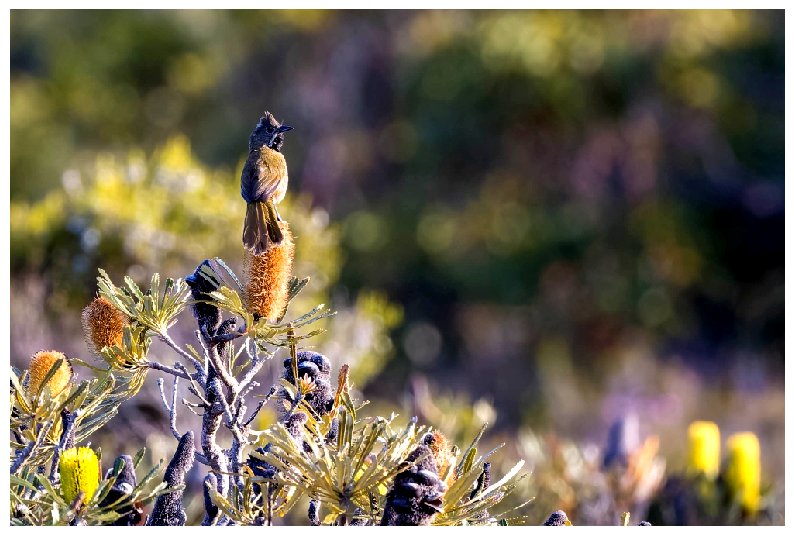

Height:  667
Width:  1000
Channels:  3


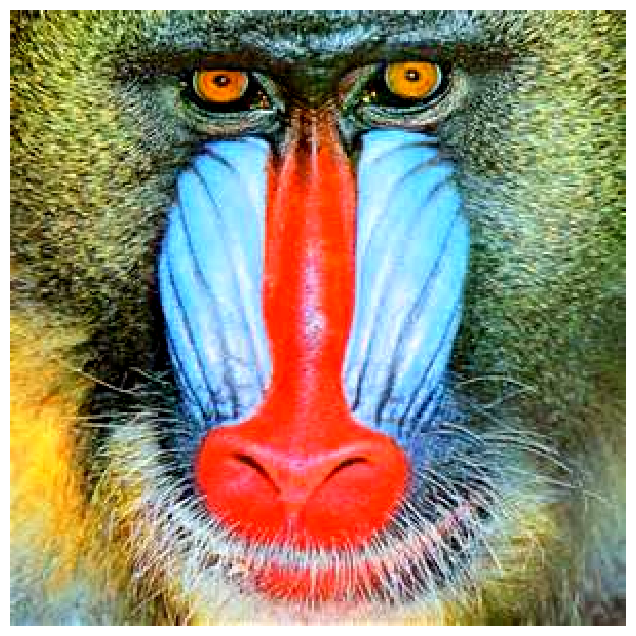

Height:  300
Width:  300
Channels:  3


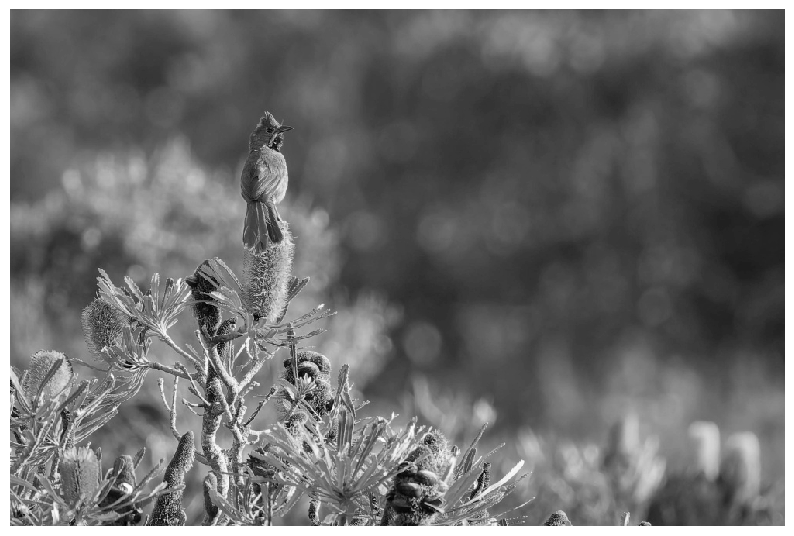

Height:  667
Width:  1000
Channels:  1


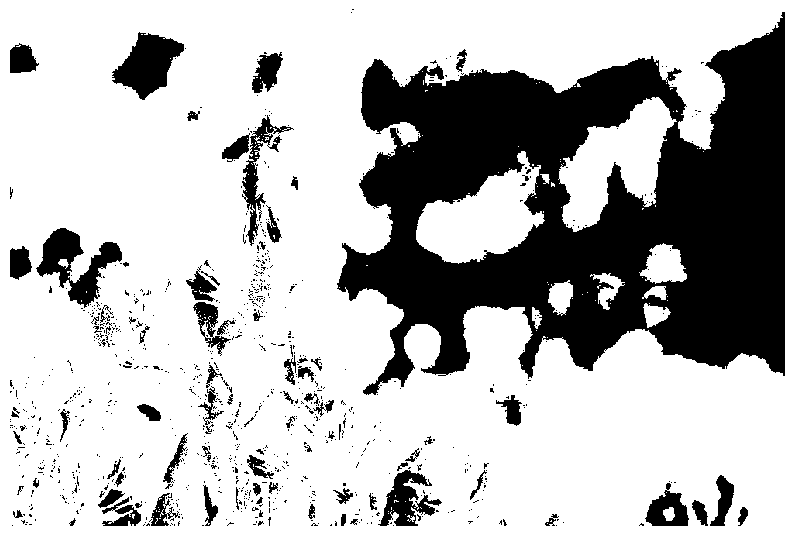

Height:  667
Width:  1000
Channels:  1


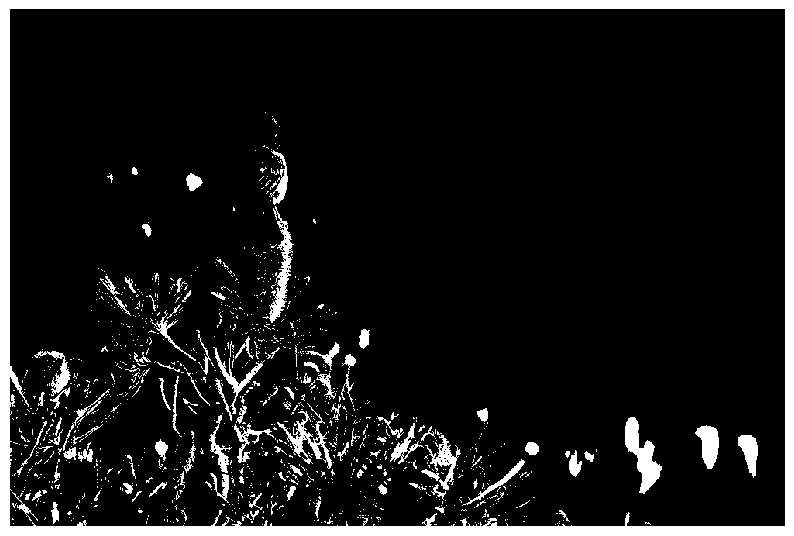

Height:  667
Width:  1000
Channels:  1


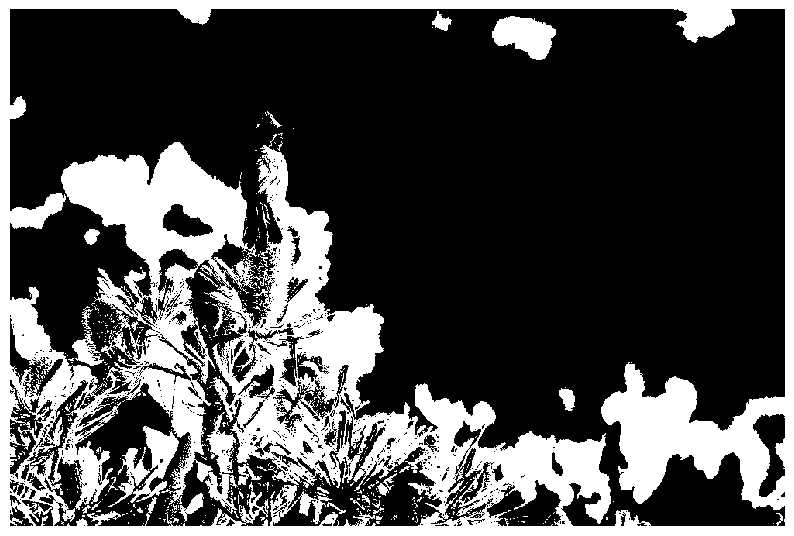

Height:  667
Width:  1000
Channels:  1


In [7]:
# This should crop the bird from the  image; you will need to adjust the parameters for the correct crop size and location
crop_img = crop(image1, 100, 250, 230, 150)
display(crop_img)
print_stats(crop_img)

resize_img = resize(crop_img, 50, 30 )
display(resize_img)
print_stats(resize_img)

contrast_img = change_contrast(resize_img, 0.5)
display(contrast_img)
print_stats(contrast_img)
contrast_img = change_contrast(image2, 0.5)
display(contrast_img)
print_stats(contrast_img)

contrast_img = change_contrast(image1, 1.5)
display(contrast_img)
print_stats(contrast_img)
contrast_img = change_contrast(image3, 1.5)
display(contrast_img)
print_stats(contrast_img)

grey_img = greyscale(image1)
display(grey_img)
print_stats(grey_img)

binary_img = binary(grey_img, 0.3)
display(binary_img)
print_stats(binary_img)

binary_img = binary(grey_img, 0.7)
display(binary_img)
print_stats(binary_img)

# Add your own tests here...
binary_img = binary(grey_img, 0.5)
display(binary_img)
print_stats(binary_img)



The changes that I observer when changing the threshold of the binary function is that the image will become more white or black depending on the threshold that is set. Lower threshold will make the image weight more to the black side and a higher threshold will make the image more white.

## Question 3: Convolution (25%)

### 3.1 2D convolution

Using the definition of 2D convolution from week 1, implement the convolution operation in the function `conv2D()` in a1code.py.


In [8]:
test_conv2D()

### 3.2 RGB convolution

In the function `conv` in a1code.py, extend your function `conv2D` to work on RGB images, by applying the 2D convolution to each channel independently. 

### 3.3 Gaussian filter convolution

Use the `gauss2D` function provided in a1code.py to create a Gaussian kernel, and apply it to your images with convolution. You will obtain marks for trying different tests and analysing the results, for example:

- try varying the image size, and the size and variance of the filter  
- subtract the filtered image from the original - this gives you an idea of what information is lost when filtering

What do you observe and why?

### 3.4 Sobel filters

Define a horizontal and vertical Sobel edge filter kernel and test them on your images. You will obtain marks for testing them and displaying results in interesting ways, for example:

- apply them to an image at different scales
- considering how to display positive and negative gradients
- apply different combinations of horizontal and vertical filters

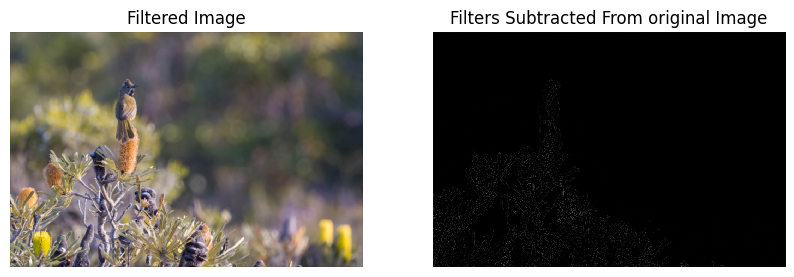

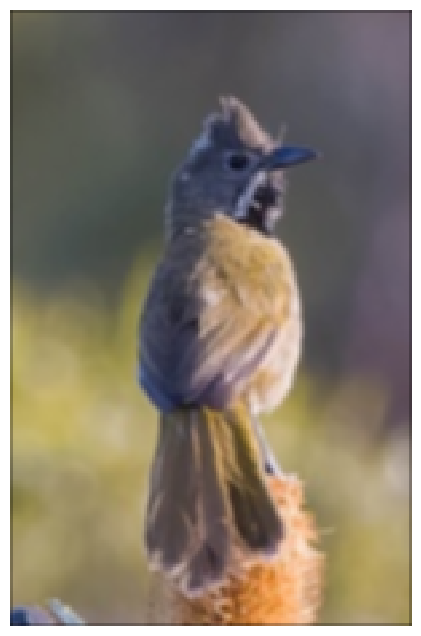

In [9]:
# Your code to answer 3.3, 3.4 and display results here.

# Question 3.3

# Using the inital Image
gaussian_kernel = gauss2D(5, 1)
conv_img = conv(image1, gaussian_kernel)

# Subtracting the original image from the convoluted image
sub_img = image1 - conv_img
sub_img = np.clip(sub_img, 0, 1)

# Displaying a filtered image and sub image side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(conv_img)
axes[0].set_title('Filtered Image')
axes[0].axis('off')
axes[1].imshow(sub_img)
axes[1].set_title('Filters Subtracted From original Image')
axes[1].axis('off')
plt.show()

# Using a smaller filter
gaussian_kernel = gauss2D(3, 1)
conv_img = conv(crop_img, gaussian_kernel)
display(conv_img)

**Analysis for 3.3**

When looking at the subtracted image, I can see that the data we are losing is the edges of the image. As the filter is smoothing the image. This is happening because the filter is taking the average of the pixels in the region of the filter. So the edges of the image are being averaged out.

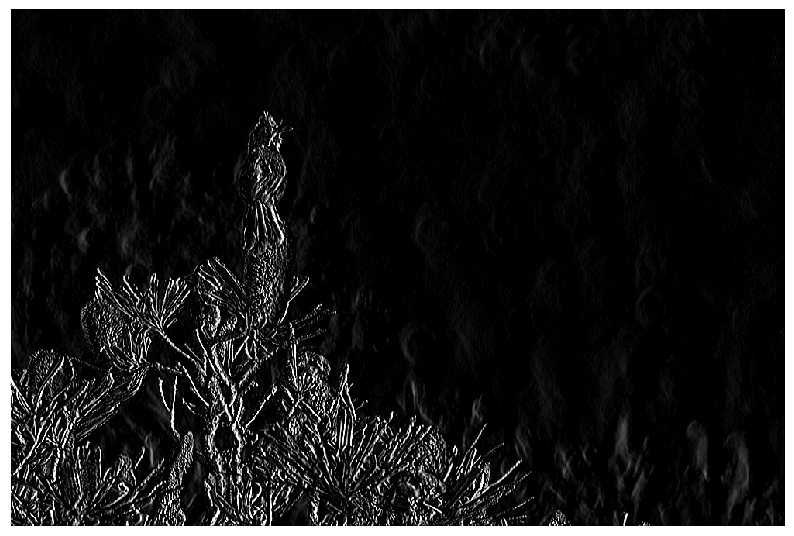

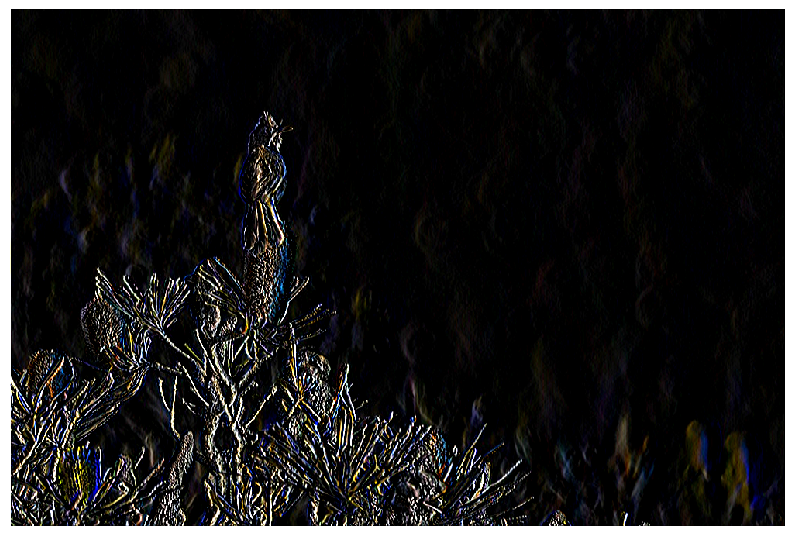

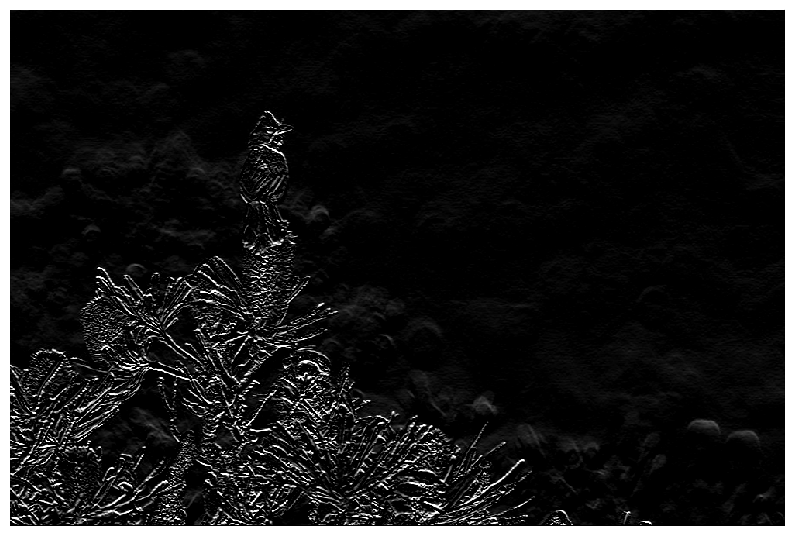

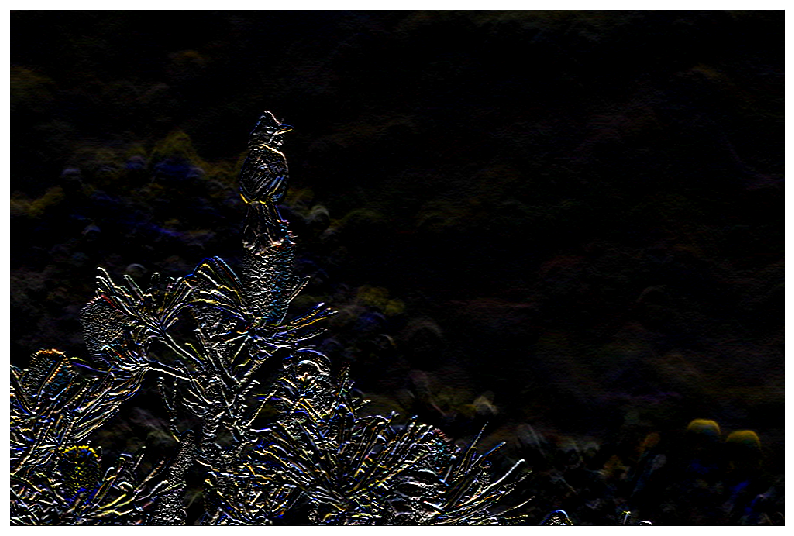

In [10]:
# Question 3.4 Sobel Filters

# here is the kernel for the vertical edge detection
kernelV = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

# example of convolution 2d
conv_img = conv(grey_img, kernelV)
display(conv_img)

# example of convolution 2d for RGB image
conv_imgRGB = conv(image1, kernelV)
display(conv_imgRGB)

# Here is the kernel for the horizontal edge detection
kernelH = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# example of convolution 2d
conv_img = conv(grey_img, kernelH)
display(conv_img)

# example of convolution 2d for RGB image
conv_imgRGB = conv(image1, kernelH)
display(conv_imgRGB)



***Your comments/analysis of your results here...***

## Question 4: Image sampling and pyramids (35%)

### 4.1 Image Sampling

Apply your `resize()` function to reduce an image (I) to 0.5 height and width

Repeat the above procedure, but apply a Gaussian blur filter to your original image before downsampling it. How does the result compare to your previous output, and to the original image? Why?


### 4.2 Image Pyramids 
Create a Gaussian pyramid as described in week2's lecture on an image.

Apply a Gaussian kernel to an image I, and resize it with ratio 0.5, to get $I_1$. Repeat this step to get $I_2$, $I_3$ and $I_4$.

Display these four images in a manner analogus to the example shown in the lectures.




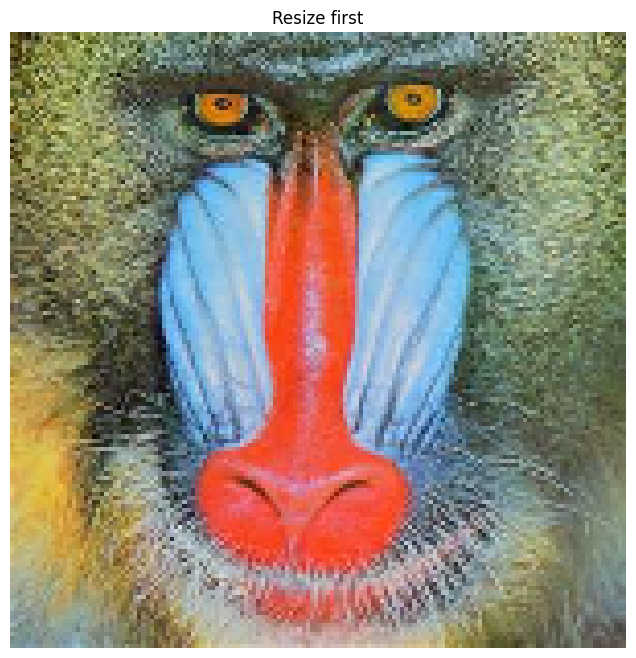

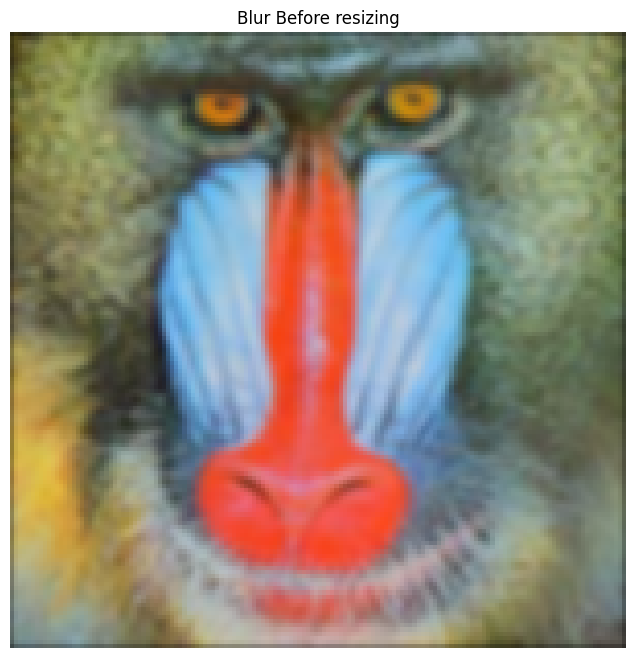

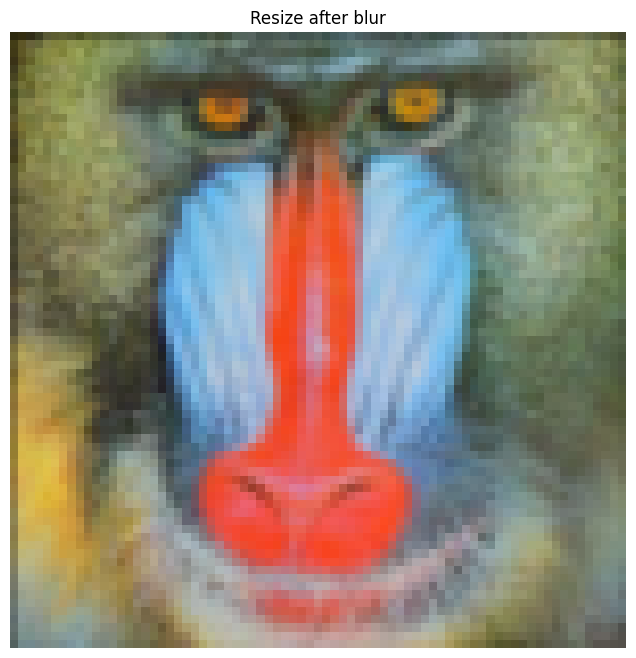

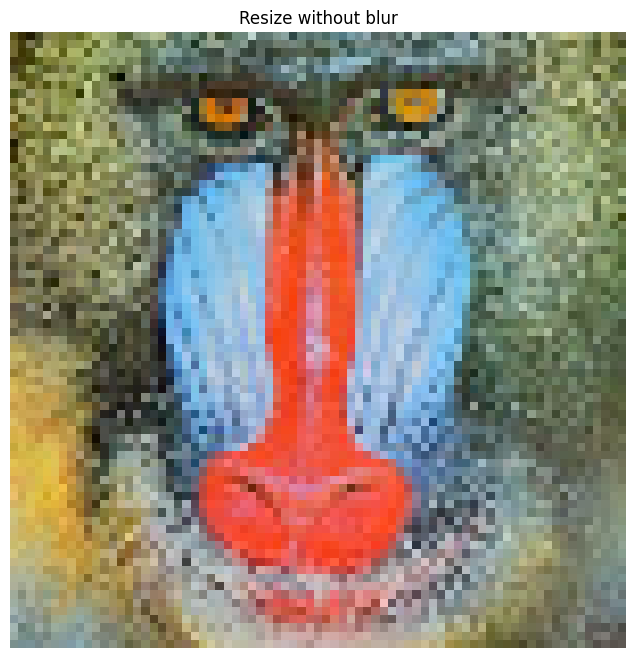

In [11]:
# Your answers to question 4 here

# Question 4.1
resize3 = resize(image3, 150, 150)
display(resize3, "Resize first")

blur1 = gauss2D(5, 1)
blurResize3 = conv(resize3, blur1)
display(blurResize3, "Blur Before resizing")

resize3again = resize(blurResize3, 75, 75)
display(resize3again, "Resize after blur")
resize3noBlur = resize(resize3, 75, 75)
display(resize3noBlur, "Resize without blur")


***Analysis after 4.1***

After looking at the different images, it can be seen that the image that has been blurred before being resized has less noise. This is because the blur filter is smoothing out the image so that the noise is less visible.

In [12]:
# Question 4.2
gaussian_kernel = gauss2D(3, 1)
initialImage = image1
preI1 = conv(initialImage, gaussian_kernel)
I1 = resize(preI1, preI1.shape[0]/2, preI1.shape[1]/2)

preI2 = conv(I1, gaussian_kernel)
I2 = resize(preI2, preI2.shape[0]/2, preI2.shape[1]/2)

preI3 = conv(I2, gaussian_kernel)
I3 = resize(preI3, preI3.shape[0]/2, preI3.shape[1]/2)

preI4 = conv(I3, gaussian_kernel)
I4 = resize(preI4, preI4.shape[0]/2, preI4.shape[1]/2)



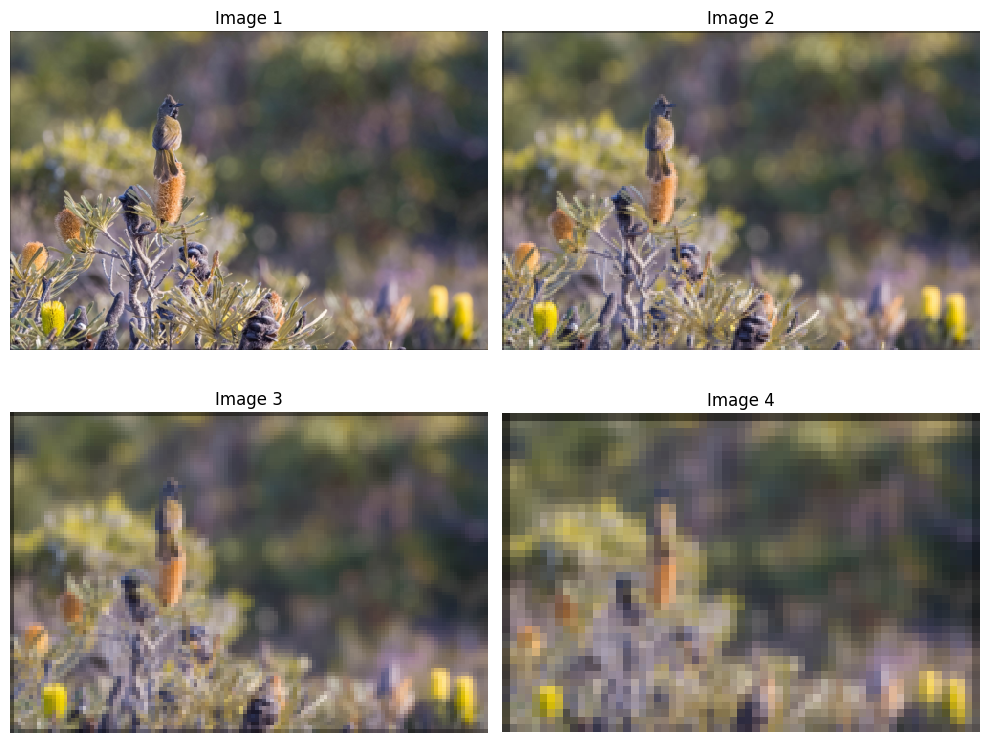

In [13]:
# showing all the images are a single plot
fig, axs = plt.subplots(2, 2)

# Display the images in a pyramid layout
axs[0, 0].imshow(I1, cmap='gray')
axs[0, 0].set_title('Image 1')
axs[0, 0].axis('off')

axs[0, 1].imshow(I2, cmap='gray')
axs[0, 1].set_title('Image 2')
axs[0, 1].axis('off')

axs[1, 0].imshow(I3, cmap='gray')
axs[1, 0].set_title('Image 3')
axs[1, 0].axis('off')

axs[1, 1].imshow(I4, cmap='gray')
axs[1, 1].set_title('Image 4')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [17]:
# Question 4.2 - with a different image
gaussian_kernel = gauss2D(3, 1)
initialImage = image3
preI1 = conv(initialImage, gaussian_kernel)
I1 = resize(preI1, preI1.shape[0]/2, preI1.shape[1]/2)

preI2 = conv(I1, gaussian_kernel)
I2 = resize(preI2, preI2.shape[0]/2, preI2.shape[1]/2)

preI3 = conv(I2, gaussian_kernel)
I3 = resize(preI3, preI3.shape[0]/2, preI3.shape[1]/2)

preI4 = conv(I3, gaussian_kernel)
I4 = resize(preI4, preI4.shape[0]/2, preI4.shape[1]/2)

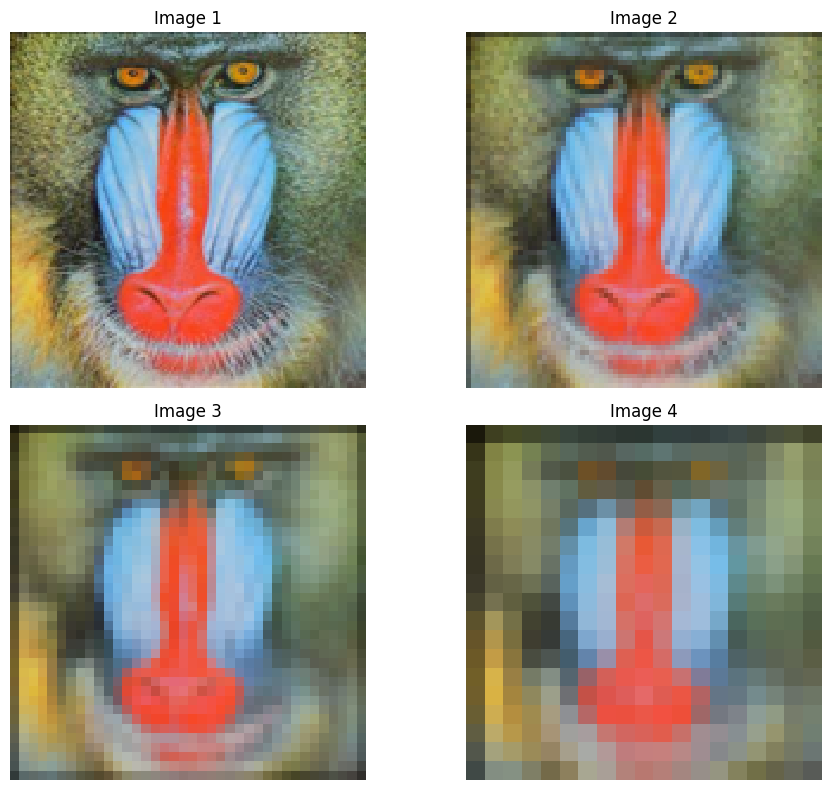

In [18]:
# showing all the images are a single plot
fig, axs = plt.subplots(2, 2)

# Display the images in a pyramid layout
axs[0, 0].imshow(I1, cmap='gray')
axs[0, 0].set_title('Image 1')
axs[0, 0].axis('off')

axs[0, 1].imshow(I2, cmap='gray')
axs[0, 1].set_title('Image 2')
axs[0, 1].axis('off')

axs[1, 0].imshow(I3, cmap='gray')
axs[1, 0].set_title('Image 3')
axs[1, 0].axis('off')

axs[1, 1].imshow(I4, cmap='gray')
axs[1, 1].set_title('Image 4')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

***Your comments/analysis of your results here...***

**Analysis for 4.2**

When looking at the images I'm able to see that over time the image is getting smaller and smaller, therefore there is less and less information in each of the images. In the images above there is a point and which you see that you lose too much information and the image becomes unrecognizable.

## Question 5: Auto correlation (optional, unassessed)

Recall from week 2 that cross-correlation is a measure of similarity between a template and an image. It is defined similarly to convolution.

### 5.1 Correlation function

Implement the function `corr()` in a1code.py, based on your convolution function. Hint: numpy's `flip()` function may be useful here.

### 5.2 Auto-correlation

We will experiment with *auto-correlation*, where the template patch is taken from the image it is being compared to. Use a crop from your image as your template. Calculate the correlation of that template with every location in the image, and display the output as an image. Where is the maximum similarity? (Hint: numpy functions `argmax()` and `unravel()` will be useful here). For simplicity, you can use a greyscale version of the image and template.

Try this on an image with some symmetry, such as a person's face and crop the eye.




In [16]:
# Your code to answer question 5 and display results here